<a href="https://colab.research.google.com/github/albertomendess/Data-Science/blob/main/Criando_Faixas_de_Valor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('/content/aluguel.csv', sep= ';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


In [ ]:
classes = [0, 2, 4, 6, 100]

In [ ]:
quartos = pd.cut(dados.Quartos, classes)
quartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2        (0.0, 2.0]
3        (0.0, 2.0]
4        (2.0, 4.0]
            ...    
19826    (0.0, 2.0]
19827    (0.0, 2.0]
19828    (0.0, 2.0]
19829    (0.0, 2.0]
19830           NaN
Name: Quartos, Length: 19831, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [ ]:
pd.value_counts(quartos)

(0, 2]      11074
(2, 4]       8094
(4, 6]        470
(6, 100]       36
Name: Quartos, dtype: int64

In [ ]:
labels = ['0 a 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais']

In [ ]:
quartos = pd.cut(dados.Quartos, classes, labels= labels, include_lowest= True)

In [ ]:
pd.value_counts(quartos)

0 a 2 quartos        11231
3 e 4 quartos         8094
5 e 6 quartos          470
7 quartos ou mais       36
Name: Quartos, dtype: int64

# RELATÓRIO DE ANÁLISE VIII

### Identificando e Removendo Outliers

In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rc('figure', figsize= (14, 6))

In [7]:
dados = pd.read_csv('/content/aluguel_residencial.csv', sep= ';')

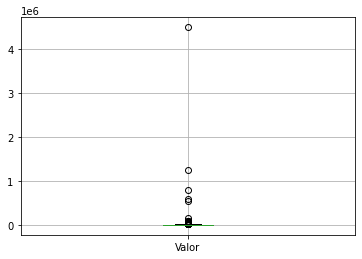

In [8]:
dados.boxplot(['Valor'])

In [9]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [13]:
Q1 = dados.Valor.quantile(.25)
Q3 = dados.Valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [14]:
selecao = (dados.Valor >= limite_inferior) & (dados.Valor <= limite_superior)
dados_new = dados[selecao]

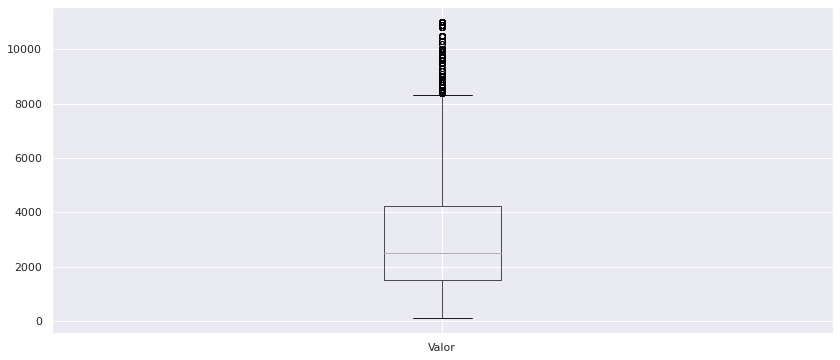

In [19]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff08c0a15d0>]],
      dtype=object)

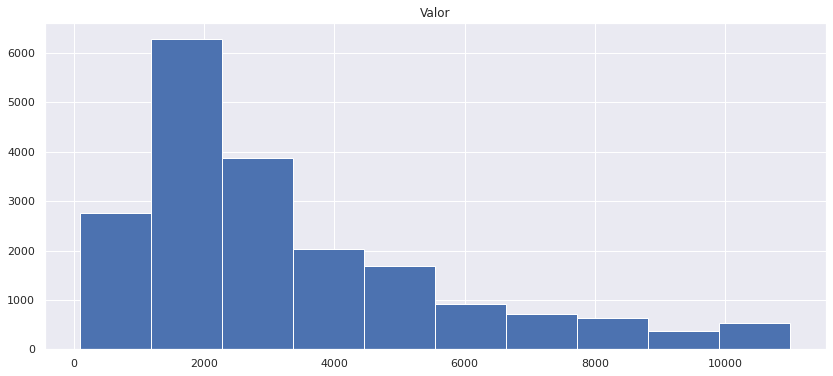

In [18]:
dados_new.hist(['Valor'])

## Idenficando e Removendo Outliers

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


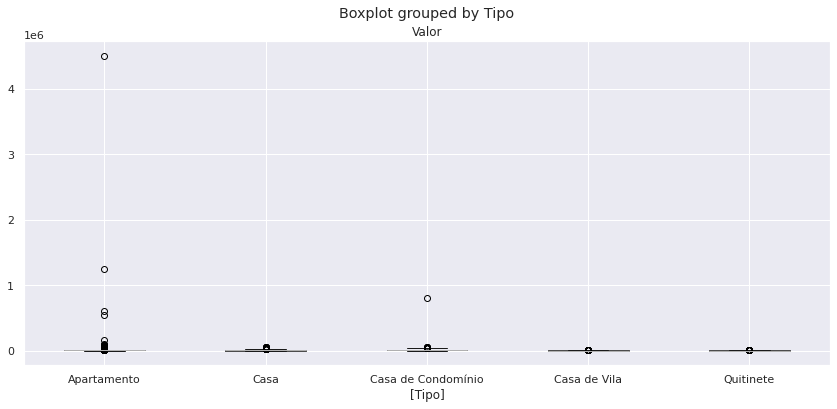

In [20]:
dados.boxplot(['Valor'], by= ['Tipo'])

In [22]:
grupo_por_tipo = dados.groupby('Tipo')['Valor']
type(grupo_por_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [25]:
Q1 = grupo_por_tipo.quantile(.25)
Q3 = grupo_por_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [26]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [27]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [28]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [29]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [30]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [32]:
limite_superior['Casa']

22850.0

In [34]:
dados_new = pd.DataFrame()
for tipo in grupo_por_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_do_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_do_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


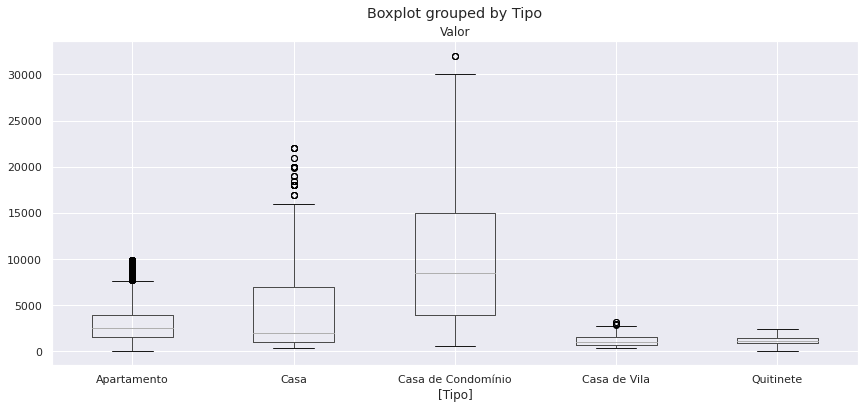

In [35]:
dados_new.boxplot(['Valor'], by= ['Tipo'])

In [36]:
dados_new.to_csv('/content/aluguel_residencial_sem_outliers.csv', sep= ';', index= False)